In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn

In [194]:
df_DS2 = pd.read_csv("../MSDS_Capstone/DS2.csv")
df_DS2_g = pd.read_csv("../MSDS_Capstone/DS2_graph.csv")


In [195]:
df_DS2.iloc[:, 3:17]

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire
0,21.0,0.0,0.0,0.0,451.0,0.0,497.0,0.0,0.0,1505.0,0.0,0.0,0.0,0.0
1,0.0,0.0,12.0,0.0,36.0,0.0,184.0,0.0,12.0,64.0,0.0,18.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,193.0,0.0,138.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,87.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,0.0,0.0,0.0,0.0,201.0,0.0,165.0,0.0,0.0,331.0,0.0,0.0,0.0,0.0
29224,0.0,0.0,0.0,0.0,309.0,0.0,98.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
29225,0.0,2.0,0.0,0.0,1953.0,0.0,391.0,0.0,0.0,773.0,0.0,119.0,0.0,0.0
29226,0.0,0.0,0.0,0.0,103.0,0.0,204.0,0.0,5.0,253.0,0.0,0.0,0.0,0.0


In [196]:
df_DS2_g

,id_student,code_module,code_presentation,id_site,sum_click,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,activity_type
0,6516,AAA,2014J,877423,21,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,dataplus
1,6516,AAA,2014J,877025,451,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,forumng
2,6516,AAA,2014J,877030,497,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,homepage
3,6516,AAA,2014J,877053,1505,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,oucontent
4,6516,AAA,2014J,877211,31,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,resource
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240352,2698588,BBB,2014J,913734,7,F,Yorkshire Region,HE Qualification,30-40%,0-35,0,120,N,Distinction,oucollaborate
240353,2698588,BBB,2014J,913528,233,F,Yorkshire Region,HE Qualification,30-40%,0-35,0,120,N,Distinction,oucontent
240354,2698588,BBB,2014J,913680,49,F,Yorkshire Region,HE Qualification,30-40%,0-35,0,120,N,Distinction,resource
240355,2698588,BBB,2014J,913696,76,F,Yorkshire Region,HE Qualification,30-40%,0-35,0,120,N,Distinction,subpage


In [197]:
df_DS2["imd_band"] = df_DS2["imd_band"].replace("10-20","10-20%")

In [198]:
df_DS2_col = list(df_DS2.columns)

In [199]:
df_DS2_col

['id_student',
 'code_module',
 'code_presentation',
 'dataplus',
 'dualpane',
 'externalquiz',
 'folder',
 'forumng',
 'glossary',
 'homepage',
 'htmlactivity',
 'oucollaborate',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'questionnaire',
 'quiz',
 'repeatactivity',
 'resource',
 'sharedsubpage',
 'subpage',
 'url',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'final_result']

In [200]:
#'dataplus', 'dualpane', 'externalquiz', 'folder', 'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate', 'oucontent',
# 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz', 'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url'
cols = ['dataplus', 'dualpane', 'externalquiz', 'folder', 'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate', 'oucontent', 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz', 'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url']


In [201]:
df_DS2["sum_click"] = df_DS2[cols].sum(axis = 1)

In [202]:
df_DS2[cols]

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,21.0,0.0,0.0,0.0,451.0,0.0,497.0,0.0,0.0,1505.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,143.0,143.0
1,0.0,0.0,12.0,0.0,36.0,0.0,184.0,0.0,12.0,64.0,0.0,18.0,0.0,0.0,0.0,0.0,70.0,0.0,227.0,23.0
2,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,193.0,0.0,138.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0
4,0.0,0.0,0.0,0.0,87.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,2.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,0.0,0.0,0.0,0.0,201.0,0.0,165.0,0.0,0.0,331.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,44.0,5.0
29224,0.0,0.0,0.0,0.0,309.0,0.0,98.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,292.0,0.0,23.0,0.0,52.0,6.0
29225,0.0,2.0,0.0,0.0,1953.0,0.0,391.0,0.0,0.0,773.0,0.0,119.0,0.0,0.0,111.0,0.0,3.0,0.0,13.0,90.0
29226,0.0,0.0,0.0,0.0,103.0,0.0,204.0,0.0,5.0,253.0,0.0,0.0,0.0,0.0,72.0,0.0,38.0,0.0,38.0,4.0


In [203]:
df_DS2

,id_student,code_module,code_presentation,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,6516,AAA,2014J,21.0,0.0,0.0,0.0,451.0,0.0,497.0,...,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,2791.0
1,8462,DDD,2013J,0.0,0.0,12.0,0.0,36.0,0.0,184.0,...,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,646.0
2,8462,DDD,2014J,0.0,0.0,0.0,0.0,2.0,0.0,7.0,...,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,10.0
3,11391,AAA,2013J,0.0,0.0,0.0,0.0,193.0,0.0,138.0,...,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0
4,23629,BBB,2013B,0.0,0.0,0.0,0.0,87.0,0.0,36.0,...,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,2698257,AAA,2013J,0.0,0.0,0.0,0.0,201.0,0.0,165.0,...,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,758.0
29224,2698535,CCC,2014B,0.0,0.0,0.0,0.0,309.0,0.0,98.0,...,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Withdrawn,786.0
29225,2698535,EEE,2013J,0.0,2.0,0.0,0.0,1953.0,0.0,391.0,...,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Pass,3455.0
29226,2698577,BBB,2014J,0.0,0.0,0.0,0.0,103.0,0.0,204.0,...,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,Fail,717.0


In [204]:
totals = []
for col in cols:
    tot = df_DS2[col].sum()
    totals.append(tot)
print(totals)

[47468.0, 20716.0, 64292.0, 5420.0, 7973390.0, 87962.0, 6949064.0, 9239.0, 108974.0, 11206803.0, 39028.0, 894512.0, 63631.0, 64764.0, 6981240.0, 9.0, 1110132.0, 171.0, 3411582.0, 566702.0]


In [205]:
col_sort = [x for _, x in sorted(zip(totals, cols))]

In [206]:
col_sort.reverse()

In [207]:
col_sort

['oucontent',
 'forumng',
 'quiz',
 'homepage',
 'subpage',
 'resource',
 'ouwiki',
 'url',
 'oucollaborate',
 'glossary',
 'questionnaire',
 'externalquiz',
 'page',
 'dataplus',
 'ouelluminate',
 'dualpane',
 'htmlactivity',
 'folder',
 'sharedsubpage',
 'repeatactivity']

(array([4.296e+03, 2.654e+03, 2.312e+03, 1.972e+03, 1.741e+03, 1.486e+03,
        1.306e+03, 1.123e+03, 9.580e+02, 8.960e+02, 8.110e+02, 7.900e+02,
        6.730e+02, 5.590e+02, 5.150e+02, 4.640e+02, 4.260e+02, 4.310e+02,
        4.010e+02, 3.470e+02, 3.130e+02, 2.970e+02, 2.820e+02, 2.910e+02,
        2.150e+02, 2.350e+02, 2.140e+02, 2.000e+02, 1.750e+02, 1.550e+02,
        1.790e+02, 1.520e+02, 1.350e+02, 1.470e+02, 1.130e+02, 1.030e+02,
        1.360e+02, 1.130e+02, 1.160e+02, 9.400e+01, 8.500e+01, 8.400e+01,
        8.000e+01, 8.000e+01, 7.100e+01, 5.800e+01, 5.300e+01, 4.200e+01,
        4.500e+01, 4.300e+01, 4.900e+01, 4.300e+01, 5.200e+01, 3.200e+01,
        2.400e+01, 2.700e+01, 3.100e+01, 2.300e+01, 2.500e+01, 2.500e+01,
        2.600e+01, 2.300e+01, 2.400e+01, 2.000e+01, 1.800e+01, 2.000e+01,
        1.100e+01, 1.600e+01, 1.400e+01, 1.100e+01, 1.100e+01, 9.000e+00,
        1.200e+01, 1.300e+01, 1.000e+01, 1.400e+01, 7.000e+00, 5.000e+00,
        9.000e+00, 1.100e+01, 8.000e+0

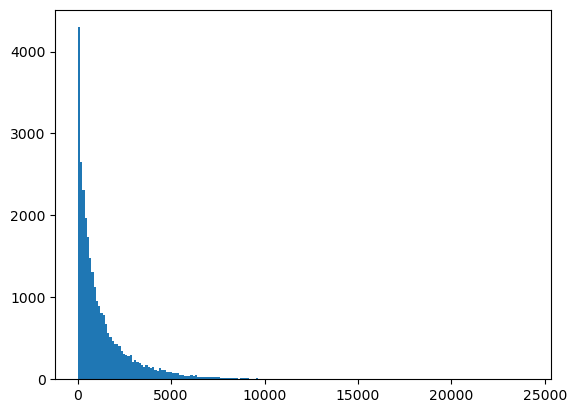

In [208]:
plt.hist(df_DS2["sum_click"],bins=200)

<Axes: xlabel='final_result', ylabel='sum_click'>

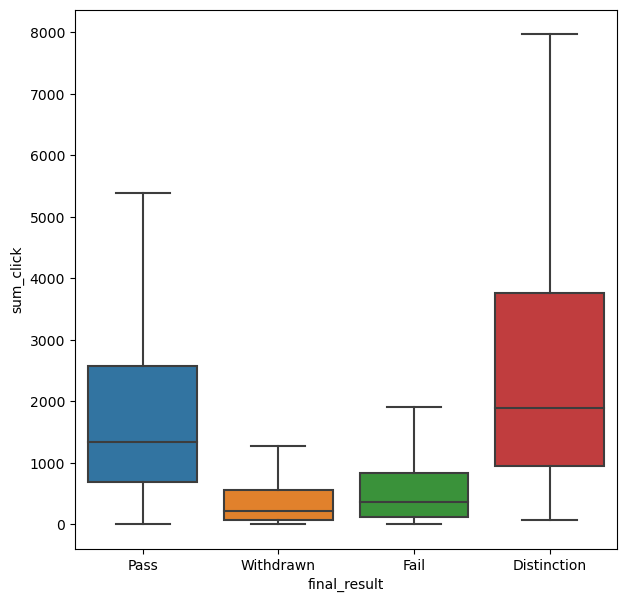

In [209]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'final_result', y = 'sum_click', data = df_DS2,showfliers=False)

In [210]:
df_pass = df_DS2_g.loc[df_DS2_g['final_result'] == "Pass"]
df_withdrawn = df_DS2_g.loc[df_DS2_g['final_result'] == "Withdrawn"]
df_fail = df_DS2_g.loc[df_DS2_g['final_result'] == "Fail"]
df_Distinction = df_DS2_g.loc[df_DS2_g['final_result'] == "Distinction"]

<Axes: xlabel='final_result', ylabel='sum_click'>

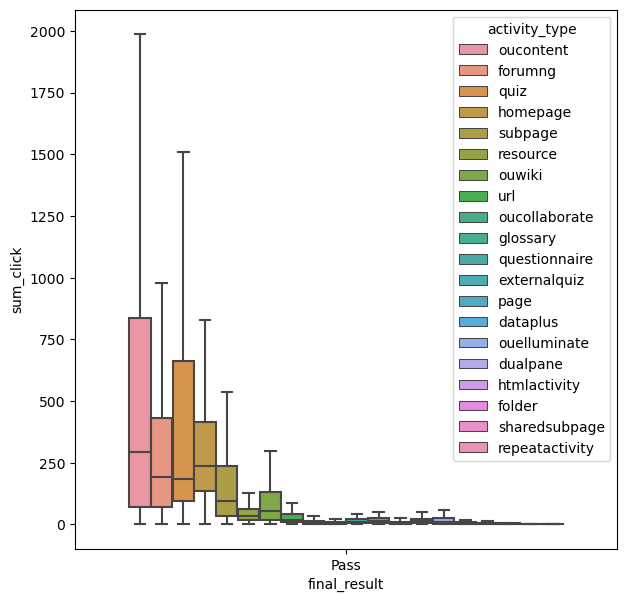

In [211]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x = 'final_result', y = 'sum_click', data = df_pass,hue = "activity_type",hue_order=col_sort,showfliers=False)

<Axes: xlabel='final_result', ylabel='sum_click'>

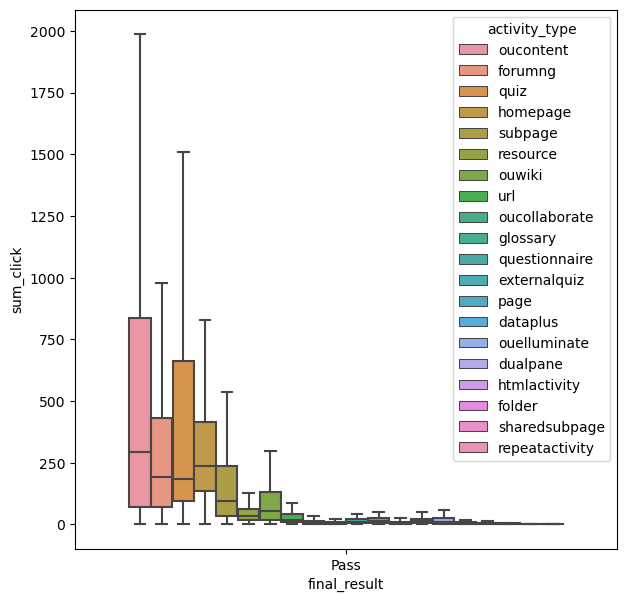

In [212]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x = 'final_result', y = 'sum_click', data = df_pass,hue = "activity_type",hue_order=col_sort,showfliers=False)

<Axes: xlabel='final_result', ylabel='sum_click'>

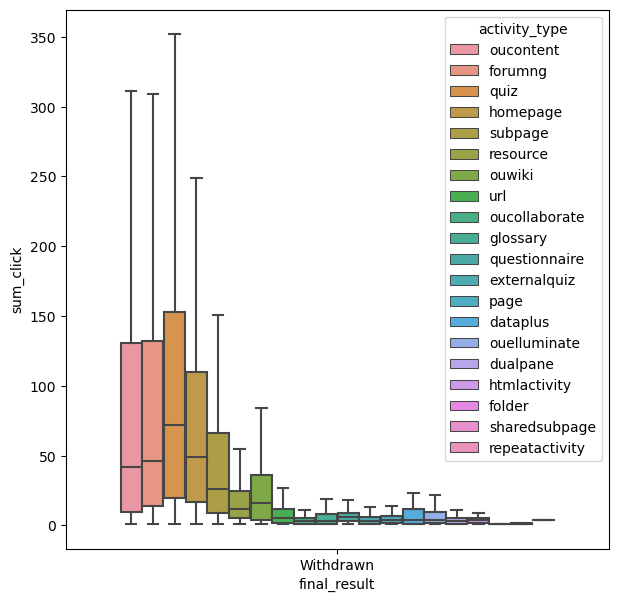

In [213]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x = 'final_result', y = 'sum_click', data = df_withdrawn,hue = "activity_type",hue_order=col_sort,showfliers=False)

<Axes: xlabel='final_result', ylabel='sum_click'>

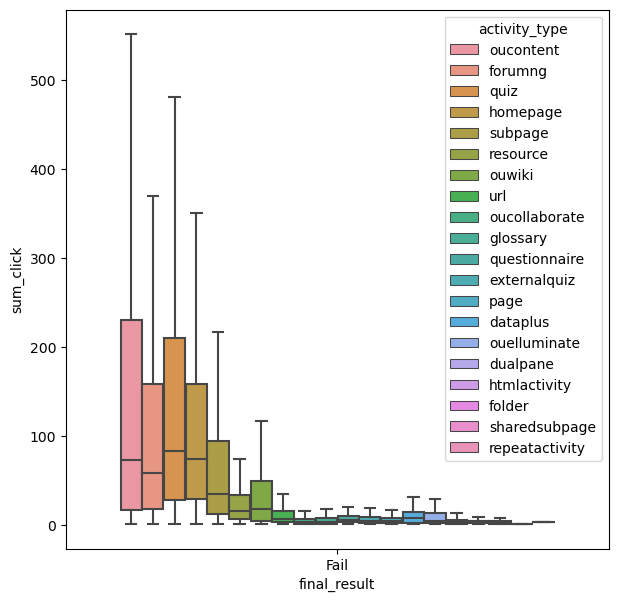

In [214]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x = 'final_result', y = 'sum_click', data = df_fail,hue = "activity_type",hue_order=col_sort,showfliers=False)

<Axes: xlabel='final_result', ylabel='sum_click'>

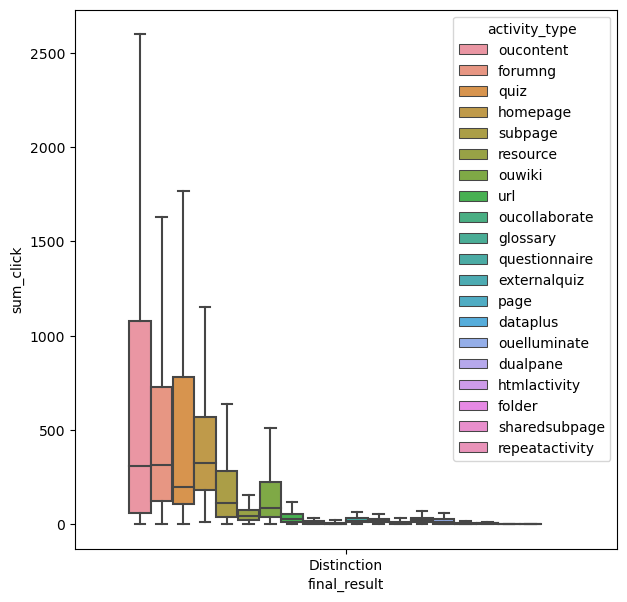

In [215]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x = 'final_result', y = 'sum_click', data = df_Distinction,hue = "activity_type",hue_order=col_sort,showfliers=False)

In [216]:
df_DS2["final_result"].value_counts()

final_result
Pass           12358
Withdrawn       7168
Fail            6678
Distinction     3024
Name: count, dtype: int64

<Axes: >

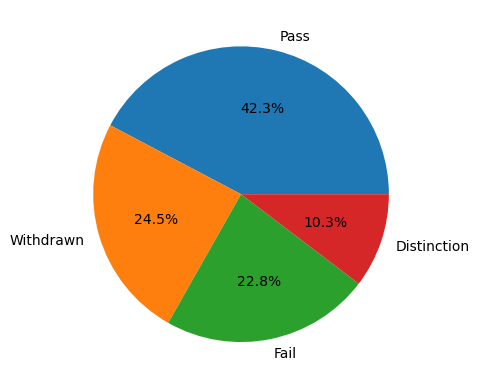

In [217]:
df_DS2["final_result"].value_counts(dropna=False).plot(kind="pie",autopct='%1.1f%%',ylabel='')

In [218]:
df_DS2

,id_student,code_module,code_presentation,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,6516,AAA,2014J,21.0,0.0,0.0,0.0,451.0,0.0,497.0,...,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,2791.0
1,8462,DDD,2013J,0.0,0.0,12.0,0.0,36.0,0.0,184.0,...,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,646.0
2,8462,DDD,2014J,0.0,0.0,0.0,0.0,2.0,0.0,7.0,...,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,10.0
3,11391,AAA,2013J,0.0,0.0,0.0,0.0,193.0,0.0,138.0,...,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0
4,23629,BBB,2013B,0.0,0.0,0.0,0.0,87.0,0.0,36.0,...,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,2698257,AAA,2013J,0.0,0.0,0.0,0.0,201.0,0.0,165.0,...,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,758.0
29224,2698535,CCC,2014B,0.0,0.0,0.0,0.0,309.0,0.0,98.0,...,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Withdrawn,786.0
29225,2698535,EEE,2013J,0.0,2.0,0.0,0.0,1953.0,0.0,391.0,...,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Pass,3455.0
29226,2698577,BBB,2014J,0.0,0.0,0.0,0.0,103.0,0.0,204.0,...,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,Fail,717.0


# Mapping
 - Student ID = Drop
 - code_module = dummies
 - code_presentation = dummies
 - leave all of the click parts
 - gender = dummies
 - region = dummies
 - highest_education = map
<details>
 A Level or Equivalent         3
Lower Than A Level             2
HE Qualification               4
Post Graduate Qualification    5  
No Formal quals                1  
</details>
 - imd_band = map as well as replace ? with mode and then try to predict. map 1-10
 - age_band = map 0 for <35, 1 for 35 - 55, 2 for >55
 - num_of_prev_attempts = leave
 - studied_credits = leave
 - disability = map 0 N, 1 
 - final result map and use for y

In [219]:
df_DS2_mapped = pd.get_dummies(df_DS2, columns = ['code_module',"code_presentation","gender","region"],dtype=int)

In [220]:
df_DS2_mapped.columns

Index(['id_student', 'dataplus', 'dualpane', 'externalquiz', 'folder',
       'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate',
       'oucontent', 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'sum_click',
       'code_module_AAA', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'code_presentation_2013B', 'code_presentation_2013J',
       'code_presentation_2014B', 'code_presentation_2014J', 'gender_F',
       'gender_M', 'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       're

In [221]:
df_DS2_mapped["final_result"] = df_DS2_mapped["final_result"].replace({"Pass":1,"Fail":0,"Withdrawn":3,"Distinction":2})

In [222]:
df_DS2_mapped["age_band"] = df_DS2_mapped["age_band"].replace({"55<=":2,"35-55":1,"0-35":0})

In [223]:
df_DS2_mapped["disability"] = df_DS2_mapped["disability"].replace({"N":0,"Y":1})

In [224]:
df_DS2_mapped["highest_education"] = df_DS2_mapped["highest_education"].replace({"No Formal quals":0,"Lower Than A Level":1,"A Level or Equivalent":2,"HE Qualification":3,"Post Graduate Qualification":4})

In [225]:
df_DS2_mapped.loc[df_DS2_mapped['imd_band'] == "?"]

,id_student,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
47,29639,0.0,0.0,0.0,0.0,2332.0,0.0,898.0,0.0,9.0,...,0,1,0,0,0,0,0,0,0,0
48,29639,0.0,1.0,0.0,0.0,1183.0,0.0,577.0,0.0,19.0,...,0,1,0,0,0,0,0,0,0,0
112,37298,0.0,0.0,0.0,0.0,160.0,0.0,248.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
130,40604,0.0,0.0,0.0,0.0,14.0,0.0,133.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
160,46705,0.0,0.0,0.0,0.0,75.0,0.0,193.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29109,2680988,0.0,0.0,12.0,0.0,655.0,5.0,464.0,0.0,9.0,...,0,1,0,0,0,0,0,0,0,0
29164,2687989,5.0,4.0,0.0,1.0,742.0,0.0,454.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
29194,2692327,0.0,0.0,0.0,0.0,26.0,0.0,545.0,0.0,7.0,...,0,1,0,0,0,0,0,0,0,0
29199,2692948,0.0,0.0,1.0,0.0,63.0,0.0,114.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
df_DS2_mapped_drpqm = df_DS2_mapped[df_DS2_mapped.imd_band != "?"]

In [227]:
df_DS2_mapped_drpqm["imd_band"] = df_DS2_mapped_drpqm["imd_band"].replace({"0-10%":0,"10-20%":1,"20-30%":2,"30-40%":3,"40-50%":4,"50-60%":5,"60-70%":6,"70-80%":7,"80-90%":8,"90-100%":9})

C:\Users\Simon\AppData\Local\Temp\ipykernel_7640\835019837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DS2_mapped_drpqm["imd_band"] = df_DS2_mapped_drpqm["imd_band"].replace({"0-10%":0,"10-20%":1,"20-30%":2,"30-40%":3,"40-50%":4,"50-60%":5,"60-70%":6,"70-80%":7,"80-90%":8,"90-100%":9})


In [228]:
df_DS2_mapped_drpqm["imd_band"].value_counts()

imd_band
2    3205
3    3193
1    3038
4    2915
5    2850
0    2829
6    2658
7    2628
8    2507
9    2351
Name: count, dtype: int64

In [229]:
df_DS2_mapped_drpqm = df_DS2_mapped_drpqm.drop("id_student",axis=1)

In [230]:
df_DS2_mapped_drpqm = df_DS2_mapped_drpqm.drop("sum_click",axis=1)

In [231]:
df_DS2_mapped_drpqm.corr()

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,...,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
dataplus,1.000000,0.486855,-0.057428,0.271848,0.228112,0.000858,0.400782,0.292303,0.071512,0.637785,...,0.002797,-0.008534,-0.005031,0.016283,0.013308,0.009800,-0.005553,-0.020055,-0.000927,-0.003174
dualpane,0.486855,1.000000,-0.063732,0.301395,0.166203,-0.007048,0.308483,0.009938,0.020274,0.518768,...,0.000871,0.000913,-0.009292,0.022652,0.005243,0.004918,-0.005517,-0.023280,-0.001627,-0.002715
externalquiz,-0.057428,-0.063732,1.000000,-0.057005,0.118251,0.143146,0.244886,-0.055080,0.301974,-0.067453,...,-0.007088,-0.009192,0.013758,-0.000635,-0.001827,0.014857,0.006797,-0.000574,-0.008386,-0.014542
folder,0.271848,0.301395,-0.057005,1.000000,0.093757,-0.006198,0.210354,-0.048616,0.056480,0.373182,...,0.019232,-0.000863,0.009555,-0.013285,0.002669,0.013728,-0.008801,-0.014485,-0.010556,-0.009192
forumng,0.228112,0.166203,0.118251,0.093757,1.000000,0.053389,0.737948,0.082602,0.207210,0.262262,...,-0.027760,-0.003116,-0.003813,0.039754,0.001152,0.022411,0.005058,-0.014434,-0.016836,-0.007249
glossary,0.000858,-0.007048,0.143146,-0.006198,0.053389,1.000000,0.091648,-0.011627,0.090185,-0.002372,...,0.000055,0.000958,-0.001896,-0.003760,-0.007288,0.012313,-0.002633,-0.005977,0.003585,0.007327
homepage,0.400782,0.308483,0.244886,0.210354,0.737948,0.091648,1.000000,0.169902,0.287987,0.554798,...,-0.010834,-0.008236,-0.000944,0.030784,0.009665,0.021623,0.004703,-0.019494,-0.017210,-0.014066
htmlactivity,0.292303,0.009938,-0.055080,-0.048616,0.082602,-0.011627,0.169902,1.000000,0.094110,0.308644,...,0.005858,0.010914,0.006372,0.002245,0.004661,-0.004151,-0.007833,0.009859,0.000298,-0.014465
oucollaborate,0.071512,0.020274,0.301974,0.056480,0.207210,0.090185,0.287987,0.094110,1.000000,0.141774,...,0.003300,-0.009224,-0.004993,0.008666,0.013284,0.013050,-0.006727,-0.019921,-0.011789,-0.011098
oucontent,0.637785,0.518768,-0.067453,0.373182,0.262262,-0.002372,0.554798,0.308644,0.141774,1.000000,...,0.010731,-0.002161,-0.006487,0.026444,0.010048,0.009361,-0.003737,-0.027694,-0.007601,-0.005641


In [232]:
from sklearn import model_selection

In [233]:
X = df_DS2_mapped_drpqm.drop("final_result",axis=1)
y = df_DS2_mapped_drpqm["final_result"]

In [234]:
X_train, X_test, y_train, y_test = model_selection.train_test_split( X, y, test_size=0.2, random_state=21)

In [235]:
from sklearn import neighbors

In [236]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [237]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [238]:
knn.predict_proba(X_test)

array([[0. , 0.8, 0.2, 0. ],
       [0. , 0.6, 0.2, 0.2],
       [0.4, 0.2, 0.2, 0.2],
       ...,
       [0.2, 0.6, 0.2, 0. ],
       [0. , 0.6, 0.4, 0. ],
       [0.4, 0.2, 0. , 0.4]])

In [239]:
knn.score(X_test,y_test)

0.5423247559893523

In [240]:
knn_scores = []
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_scores.append(knn.score(X_test,y_test))

In [241]:
print("Optimal KNN value is ", knn_scores.index(max(knn_scores))+1,max(knn_scores))

Optimal KNN value is  49 0.5911268855368235


In [242]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [243]:
knn = neighbors.KNeighborsClassifier(n_neighbors=knn_scores.index(max(knn_scores))+1)
knn.fit(X_train,y_train)
predy = knn.predict(X_test)
target_names = ['Fail', 'Pass',"Distinction","Withdrawn"]
print(classification_report(y_test,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.4637    0.2292    0.3067      1283
        Pass     0.6200    0.9177    0.7401      2381
 Distinction     0.2083    0.0088    0.0170       565
   Withdrawn     0.5829    0.6024    0.5925      1406

    accuracy                         0.5911      5635
   macro avg     0.4688    0.4395    0.4141      5635
weighted avg     0.5339    0.5911    0.5321      5635



In [244]:
from sklearn import tree

In [245]:
dec_tree = tree.DecisionTreeClassifier(random_state=0,max_depth = 100)

In [246]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=100, random_state=0)

In [247]:
dec_tree.score(X_test,y_test)

0.5171251109139308

In [248]:
dec_tree_score = []
for i in range(1,100):
    dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = i)
    dec_treel.fit(X_train,y_train)
    dec_tree_score.append(dec_treel.score(X_test,y_test))

In [249]:
print("Optimal DT value is ", dec_tree_score.index(max(dec_tree_score))+1,max(dec_tree_score))

Optimal DT value is  8 0.6145519077196095


In [250]:
dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = dec_tree_score.index(max(dec_tree_score))+1)

dec_treel.fit(X_train,y_train)
predy = dec_treel.predict(X_test)

print(classification_report(y_test,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.4843    0.2401    0.3210      1283
        Pass     0.6582    0.8971    0.7593      2381
 Distinction     0.3761    0.0779    0.1290       565
   Withdrawn     0.5956    0.6935    0.6408      1406

    accuracy                         0.6146      5635
   macro avg     0.5285    0.4771    0.4625      5635
weighted avg     0.5747    0.6146    0.5668      5635



In [251]:
from sklearn import naive_bayes

In [252]:
nb = naive_bayes.MultinomialNB()

In [253]:
nb.fit(X_train,y_train)

MultinomialNB()

In [254]:
nb.score(X_test,y_test)

0.41881100266193433

In [255]:

predy2 = nb.predict(X_test)

print(classification_report(y_test,predy2,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.2490    0.1902    0.2156      1283
        Pass     0.6533    0.3704    0.4728      2381
 Distinction     0.2235    0.3133    0.2609       565
   Withdrawn     0.4206    0.7518    0.5394      1406

    accuracy                         0.4188      5635
   macro avg     0.3866    0.4064    0.3722      5635
weighted avg     0.4601    0.4188    0.4096      5635



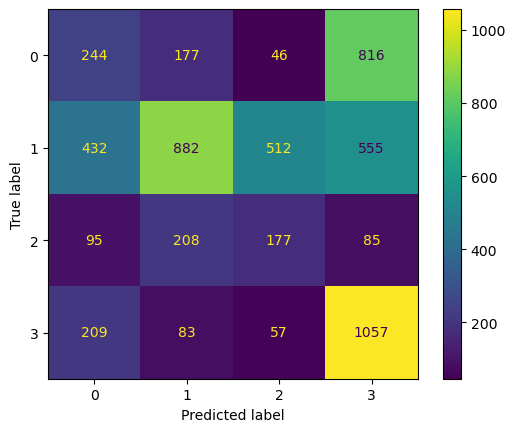

In [256]:
cm = confusion_matrix(y_test, predy2, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=nb.classes_)
disp.plot()

plt.show()

In [257]:
from sklearn import ensemble

In [258]:
rf = ensemble.RandomForestClassifier(random_state = 0)

In [259]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [260]:
rf.score(X_test,y_test)

0.6392191659272405

In [261]:

predy2 = rf.predict(X_test)

print(classification_report(y_test,predy2,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.5294    0.3157    0.3955      1283
        Pass     0.6652    0.9362    0.7777      2381
 Distinction     0.5395    0.0726    0.1279       565
   Withdrawn     0.6424    0.6593    0.6508      1406

    accuracy                         0.6392      5635
   macro avg     0.5941    0.4959    0.4880      5635
weighted avg     0.6160    0.6392    0.5939      5635



<Axes: >

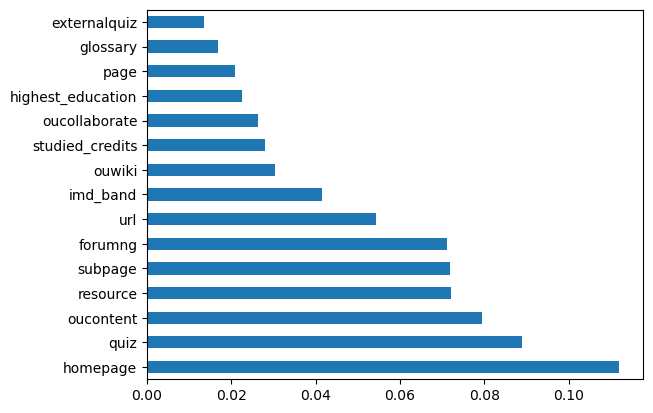

In [262]:
feat_importances = pd.Series(rf.feature_importances_, index=X_test.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [263]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=49)
clf2 = naive_bayes.MultinomialNB()
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth = 8)

In [264]:
eclf1 = ensemble.VotingClassifier(estimators=[
        ('knn', clf1), ('gnb', clf2), ('dt', clf3)], voting='hard')


In [265]:
eclf1.fit(X_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=49)),
                             ('gnb', MultinomialNB()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=8,
                                                     random_state=0))])

In [266]:
eclf1.score(X_test,y_test)

0.6015971606033718

In [267]:

predy2 = eclf1.predict(X_test)

print(classification_report(y_test,predy2,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.4374    0.2206    0.2933      1283
        Pass     0.6587    0.8778    0.7526      2381
 Distinction     0.3373    0.0496    0.0864       565
   Withdrawn     0.5710    0.7034    0.6303      1406

    accuracy                         0.6016      5635
   macro avg     0.5011    0.4628    0.4407      5635
weighted avg     0.5542    0.6016    0.5507      5635



In [268]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
sm = SMOTE(random_state=21)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [269]:
knn_scores = []
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_res,y_res)
    knn_scores.append(knn.score(X_test,y_test))
    
knn = neighbors.KNeighborsClassifier(n_neighbors=knn_scores.index(max(knn_scores))+1)
knn.fit(X_res,y_res)
predy = knn.predict(X_test)
target_names = ['Fail', 'Pass',"Withdrawn","Distinction"]
print(classification_report(y_test,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.3845    0.3671    0.3756      1283
        Pass     0.6596    0.3940    0.4933      2381
   Withdrawn     0.2249    0.6230    0.3305       565
 Distinction     0.5446    0.5512    0.5479      1406

    accuracy                         0.4500      5635
   macro avg     0.4534    0.4838    0.4368      5635
weighted avg     0.5247    0.4500    0.4638      5635



In [270]:
dec_tree_score = []
for i in range(1,100):
    dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = i)
    dec_treel.fit(X_res,y_res)
    dec_tree_score.append(dec_treel.score(X_test,y_test))
    
dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = dec_tree_score.index(max(dec_tree_score))+1)

dec_treel.fit(X_res,y_res)
predy = dec_treel.predict(X_test)

print(classification_report(y_test,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.4246    0.3422    0.3789      1283
        Pass     0.6823    0.7010    0.6915      2381
   Withdrawn     0.2885    0.3416    0.3128       565
 Distinction     0.5740    0.6067    0.5899      1406

    accuracy                         0.5597      5635
   macro avg     0.4924    0.4979    0.4933      5635
weighted avg     0.5571    0.5597    0.5570      5635



In [271]:
nb.fit(X_res,y_res)
predy2 = nb.predict(X_test)

print(classification_report(y_test,predy2,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.2490    0.1933    0.2176      1283
        Pass     0.6572    0.3679    0.4717      2381
   Withdrawn     0.2263    0.3168    0.2640       565
 Distinction     0.4195    0.7504    0.5381      1406

    accuracy                         0.4185      5635
   macro avg     0.3880    0.4071    0.3729      5635
weighted avg     0.4617    0.4185    0.4096      5635



In [272]:
rf.fit(X_res,y_res)
predy2 = rf.predict(X_test)

print(classification_report(y_test,predy2,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.5128    0.3578    0.4215      1283
        Pass     0.6751    0.8492    0.7522      2381
   Withdrawn     0.3758    0.2142    0.2728       565
 Distinction     0.6416    0.6494    0.6455      1406

    accuracy                         0.6238      5635
   macro avg     0.5513    0.5176    0.5230      5635
weighted avg     0.5998    0.6238    0.6022      5635



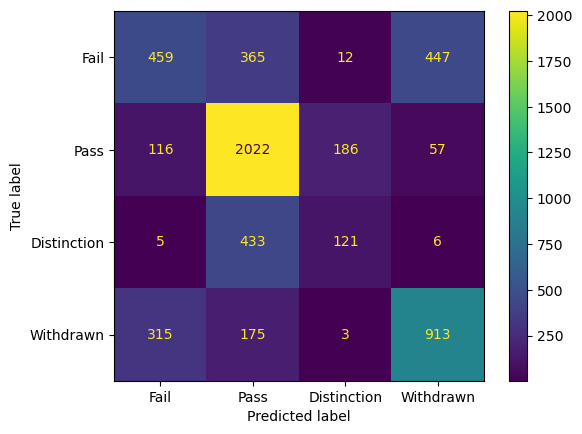

In [274]:
cm = confusion_matrix(y_test, predy2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= ['Fail', 'Pass','Distinction',"Withdrawn"])
disp.plot()

plt.show()

In [ ]:
eclf1.fit(X_res,y_res)
predy2 = eclf1.predict(X_test)

print(classification_report(y_test,predy2,target_names = target_names,digits = 4))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbclf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)

In [ ]:
gbclf.fit(X_train,y_train)

In [ ]:
gbclf.score(X_test,y_test)

In [ ]:
eclf2 = ensemble.VotingClassifier(estimators=[
        ('knn', clf1), ('gnb', clf2), ('dt', clf3),("rf",rf),("gbclf",gbclf)])

In [ ]:
eclf2.fit(X_train,y_train)

In [ ]:
eclf2.score(X_test,y_test)

In [ ]:
df_DS2_map_norm_drpqm = df_DS2_mapped_drpqm.copy()

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
X_l1 = df_DS2_mapped_drpqm.drop("final_result",axis=1)
y_l1 = df_DS2_mapped_drpqm["final_result"]
cols_xl1 = X_l1.columns

In [ ]:
X_l1 = normalize(X_l1, norm="l1")

In [ ]:
X_l1 = pd.DataFrame(X_l1, columns = cols_xl1)

In [ ]:
X_l1

In [ ]:
X_trainl1, X_testl1, y_trainl1, y_testl1 = model_selection.train_test_split( X_l1, y_l1, test_size=0.2, random_state=21)

In [ ]:
rf.fit(X_trainl1,y_trainl1)

In [ ]:
rf.score(X_testl1,y_testl1)

In [ ]:
eclf1.fit(X_trainl1,y_trainl1)

In [ ]:
eclf1.score(X_testl1,y_testl1)

In [ ]:
eclf2.fit(X_trainl1,y_trainl1)

In [ ]:
eclf2.score(X_testl1,y_testl1)

In [ ]:
df_DS2_mapped_drpqm_3cat = df_DS2_mapped_drpqm.copy()

In [ ]:
df_DS2_mapped_drpqm_3cat["final_result"] = df_DS2_mapped_drpqm_3cat["final_result"].replace({2:1})

In [ ]:
df_DS2_mapped_drpqm_3cat["final_result"].value_counts(dropna=False).plot(kind="pie")
#replace({"Pass":1,"Fail":0,"Withdrawn":3,"Distinction":1})

In [ ]:
df_DS2_mapped_drpqm_3cat["final_result"].value_counts()

In [ ]:
X3c = df_DS2_mapped_drpqm_3cat.drop("final_result",axis=1)
y3c = df_DS2_mapped_drpqm_3cat["final_result"]

In [ ]:
X3c_train, X3c_test, y3c_train, y3c_test = model_selection.train_test_split( X3c, y3c, test_size=0.2, random_state=21)

In [ ]:
knn_scores = []
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X3c_train,y3c_train)
    knn_scores.append(knn.score(X3c_test,y3c_test))

In [ ]:
print("Optimal KNN value is ", knn_scores.index(max(knn_scores))+1,max(knn_scores))

In [ ]:
dec_tree_score = []
for i in range(1,100):
    dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = i)
    dec_treel.fit(X3c_train,y3c_train)
    dec_tree_score.append(dec_treel.score(X3c_test,y3c_test))

In [ ]:
print("Optimal DT value is ", dec_tree_score.index(max(dec_tree_score))+1,max(dec_tree_score))

In [ ]:
nb.fit(X3c_train,y3c_train)

In [ ]:
nb.score(X3c_test,y3c_test)

In [ ]:
rf.fit(X3c_train,y3c_train)

In [ ]:
rf.score(X3c_test,y3c_test)

In [ ]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=49)
clf2 = naive_bayes.MultinomialNB()
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth = 8)

In [ ]:
eclf1 = ensemble.VotingClassifier(estimators=[
        ('knn', clf1), ('gnb', clf2), ('dt', clf3)], voting='hard')

In [ ]:
eclf1.fit(X3c_train,y3c_train)

In [ ]:
eclf1.score(X3c_test,y3c_test)

In [ ]:
eclf2.fit(X3c_train,y3c_train)

In [ ]:
eclf2.score(X3c_test,y3c_test)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest

In [ ]:
X3csfs = df_DS2_mapped_drpqm.drop("final_result",axis=1)
y3csfs = df_DS2_mapped_drpqm["final_result"]

In [ ]:
sfs = SequentialFeatureSelector(eclf1)
#change the number of features as well as the model and drop the code modules etc. 

sfs.fit(X3csfs, y3csfs)

sfs.transform(X3csfs)

cols_sfs = sfs.get_feature_names_out()

cols_sfs

X3csfs = pd.DataFrame(X3csfs, columns = cols_sfs)

X3csfs

X3csfs_train, X3csfs_test, y3csfs_train, y3csfs_test = model_selection.train_test_split( X3csfs, y3csfs, test_size=0.2, random_state=21)

rf.fit(X3csfs_train,y3csfs_train)

rf.score(X3csfs_test,y3csfs_test)

In [ ]:
X3cskb = df_DS2_mapped_drpqm.drop("final_result",axis=1)
y3cskb = df_DS2_mapped_drpqm["final_result"]

In [ ]:
skb = SelectKBest(k=10)

In [ ]:
skb.fit(X3cskb, y3cskb)

In [ ]:
skb.transform(X3cskb)

In [ ]:
cols_skb = skb.get_feature_names_out()

In [ ]:
X3cskb = pd.DataFrame(X3cskb, columns = cols_skb)

In [ ]:
X3cskb

In [ ]:
X3cskb_train, X3cskb_test, y3cskb_train, y3cskb_test = model_selection.train_test_split( X3cskb, y3cskb, test_size=0.2, random_state=21)

In [ ]:
rf.fit(X3cskb_train,y3cskb_train)

In [ ]:
rf.score(X3cskb_test,y3cskb_test)

In [ ]:
cols_X3cskb_l1 = X3cskb.columns

In [ ]:
X3cskb = normalize(X3cskb, norm="l2")

In [ ]:
X3cskb = pd.DataFrame(X3cskb, columns = cols_X3cskb_l1)

In [ ]:
X3cskb_train, X3cskb_test, y3cskb_train, y3cskb_test = model_selection.train_test_split( X3cskb, y3cskb, test_size=0.2, random_state=21)

In [ ]:
rf.fit(X3cskb_train,y3cskb_train)

In [ ]:
rf.score(X3cskb_test,y3cskb_test)

In [ ]:
X3cskb

In [ ]:
df_DS2_mapped_drpqm2cat = df_DS2_mapped_drpqm.copy()

In [ ]:
df_DS2_mapped_drpqm2cat["final_result"] = df_DS2_mapped_drpqm2cat["final_result"].replace({3:0,2:1})

In [ ]:
df_DS2_mapped_drpqm2cat["final_result"].value_counts(dropna=False).plot(kind="pie")
#replace({"Pass":1,"Fail":0,"Withdrawn":3,"Distinction":1})

In [ ]:
X_2cat = df_DS2_mapped_drpqm2cat.drop("final_result",axis=1)
y_2cat = df_DS2_mapped_drpqm2cat["final_result"]

In [ ]:
X2c_train, X2c_test, y2c_train, y2c_test = model_selection.train_test_split( X_2cat, y_2cat, test_size=0.2, random_state=21)

In [ ]:
knn_scores = []
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2c_train,y2c_train)
    knn_scores.append(knn.score(X2c_test,y2c_test))

In [ ]:
print("Optimal KNN value is ", knn_scores.index(max(knn_scores))+1,max(knn_scores))

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=knn_scores.index(max(knn_scores))+1)
knn.fit(X2c_train,y2c_train)
predy = knn.predict(X2c_test)
target_names = ['Fail', 'Pass']
print(classification_report(y2c_test,predy,target_names = target_names,digits = 4))

In [ ]:
dec_tree_score = []
for i in range(1,100):
    dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = i)
    dec_treel.fit(X2c_train,y2c_train)
    dec_tree_score.append(dec_treel.score(X2c_test,y2c_test))

In [ ]:
print("Optimal DT value is ", dec_tree_score.index(max(dec_tree_score))+1,max(dec_tree_score))

In [ ]:
dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = dec_tree_score.index(max(dec_tree_score))+1)

dec_treel.fit(X2c_train,y2c_train)
predy = dec_treel.predict(X2c_test)

print(classification_report(y2c_test,predy,target_names = target_names,digits = 4))

In [ ]:
nb.fit(X2c_train,y2c_train)

In [ ]:
nb.score(X2c_test,y2c_test)

In [ ]:
predy = nb.predict(X2c_test)

print(classification_report(y2c_test,predy,target_names = target_names,digits = 4))

In [ ]:
gnb = naive_bayes.GaussianNB()

In [ ]:
gnb.fit(X2c_train,y2c_train)

In [ ]:
gnb.score(X2c_test,y2c_test)

In [ ]:
rf.fit(X2c_train,y2c_train)

In [ ]:
rf.score(X2c_test,y2c_test)

In [ ]:
predy = rf.predict(X2c_test)

print(classification_report(y2c_test,predy,target_names = target_names,digits = 4))

In [ ]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=21)
clf2 = naive_bayes.MultinomialNB()
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth = 8)

In [ ]:
eclf1 = ensemble.VotingClassifier(estimators=[
        ('knn', clf1), ('gnb', clf2), ('dt', clf3)], voting='hard')

In [ ]:
eclf1.fit(X2c_train,y2c_train)

In [ ]:
eclf1.score(X2c_test,y2c_test)

In [ ]:
predy = eclf1.predict(X2c_test)

print(classification_report(y2c_test,predy,target_names = target_names,digits = 4))

In [ ]:
eclf2 = ensemble.VotingClassifier(estimators=[
        ('knn', clf1), ('gnb', clf2), ('dt', clf3),("rf",rf)])

In [ ]:
eclf2.fit(X2c_train,y2c_train)

In [ ]:
eclf2.score(X2c_test,y2c_test)

In [ ]:
gbclf.fit(X2c_train,y2c_train)

In [ ]:
gbclf.score(X2c_test,y2c_test)

In [ ]:
eclf3 = ensemble.VotingClassifier(estimators=[
        ('knn', clf1), ('gnb', clf2), ('dt', clf3),("rf",rf),("gbclf",gbclf)])

In [ ]:
eclf3.fit(X2c_train,y2c_train)

In [ ]:
eclf3.score(X2c_test,y2c_test)

In [ ]:
skb.fit(X_2cat, y_2cat)

In [ ]:
skb.transform(X_2cat)

In [ ]:
cols_skb = skb.get_feature_names_out()

In [ ]:
X_2catskb = pd.DataFrame(X_2cat, columns = cols_skb)

In [ ]:
X_2catskb

In [ ]:
X2c_train, X2c_test, y2c_train, y2c_test = model_selection.train_test_split( X_2catskb, y_2cat, test_size=0.2, random_state=21)

In [ ]:
rf.fit(X2c_train,y2c_train)

In [ ]:
rf.score(X2c_test,y2c_test)

In [ ]:
score = 0
best = 0
cols2c = "a"
for i in range(1,len(X_2cat.columns)):
    skb = SelectKBest(k=i)
    skb.fit(X_2cat, y_2cat)
    skb.transform(X_2cat)
    cols_skb = skb.get_feature_names_out()
    X_2catskb = pd.DataFrame(X_2cat, columns = cols_skb)
    X2c_train, X2c_test, y2c_train, y2c_test = model_selection.train_test_split( X_2catskb, y_2cat, test_size=0.2, random_state=21)
    rf.fit(X2c_train,y2c_train)
    tmpscr = rf.score(X2c_test,y2c_test)
    if tmpscr > score:
        score = tmpscr
        best = i
        cols2c = cols_skb


In [ ]:
print("Best k fatures:",best," with a score: ",score,"% \n",cols2c)

In [ ]:
len(X_2cat.columns)

In [ ]:
skb = SelectKBest(k=45)
skb.fit(X_2cat, y_2cat)
skb.transform(X_2cat)
cols_skb = skb.get_feature_names_out()
X_2catskb = pd.DataFrame(X_2cat, columns = cols_skb)
X2c_train, X2c_test, y2c_train, y2c_test = model_selection.train_test_split( X_2catskb, y_2cat, test_size=0.2, random_state=21)
rf.fit(X2c_train,y2c_train)
pred = rf.predict(X2c_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
cm = confusion_matrix(y2c_test, pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

plt.show()

In [ ]:
print(classification_report(y2c_test,pred,digits = 4))